# Social Computing - Summer 2019

# Exercise 2 - Centrality
Centrality is a key concept in social network analysis. It measures the importance or influence of a certain node/edge in a network. The interpretation of importance or influence, however, depends on the type of centrality and the application for which it is measured. Different types of centrality were discussed in the lecture: degree centrality, closeness centrality, betweenness centrality and eigenvector centrality.<br>
In this exercise, you are going to implement different centrality algorithms using the igraph library which you already know from last exercise. You can find its manual [here](https://igraph.org/python/doc/igraph-module.html) and a tutorial [here](https://igraph.org/python/doc/tutorial/tutorial.html).

## Introduction Problem: The Krackhardt Kite Graph
We will use the Krackhardt Kite for the first exercise. As you know from exercise 1, the Krackhardt Kite is a simple connected, unweighted and undirected graph. [This figure](https://en.wikipedia.org/wiki/Krackhardt_kite_graph#/media/File:Krackhard_kite.PNG) illustrates the Krackhardt Kite.

**Calculate the degree centrality of the Krackhardt Kite graph - just a list of ten values, one for each node. You can use the pre-defined function of the igraph library.**

**Optional:** Look at the graph and the list with the degree centrality values. Can you identify which node has which degree centrality?<br>
**Optional:** Calculate the closeness and betweeness centrality as well. What information do they give us?

Degree centrality : 
[4, 4, 3, 6, 3, 5, 5, 3, 2, 1]

Betweenness centrality: 
[0.8333333333333333, 0.8333333333333333, 0.0, 3.666666666666666, 0.0, 8.333333333333334, 8.333333333333334, 14.0, 8.0, 0.0]

Closeness centrality: 
[0.5294117647058824, 0.5294117647058824, 0.5, 0.6, 0.5, 0.6428571428571429, 0.6428571428571429, 0.6, 0.42857142857142855, 0.3103448275862069]


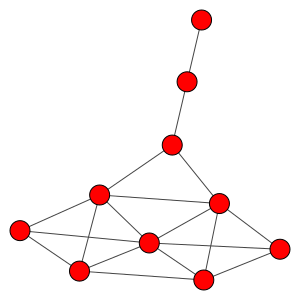

In [1]:
import igraph as ig

# Importing the graph (connected, unweighted, undirected social network)
krackhardt_kite = ig.Graph.Famous('Krackhardt_Kite')

# Formatting the graph
visual_style = {}
visual_style['vertex_size'] = 20
visual_style['bbox'] = (300, 300)
visual_style['margin'] = 20

# TODO: Calculate the Kite's degree centrality
# Degree centrality gives us the number of ties a node has
# It is the number of links that are incident upon a node
print("Degree centrality : ")
print(krackhardt_kite.degree())

# Betweenness centrality quantifies the number of times a node act as a
# bridge along the shortest path between two other nodes
# Vertices that have a high probability to occur on a randomly chosen shortest path
# between two randomly chosen vertices have high betweenness
print("\nBetweenness centrality: ")
print(krackhardt_kite.betweenness())

# Closeness centrality gives us a measure of how central a node is to all the other nodes in the graph
# Closeness centrality of a node is the average length of the shortest path between the node and all other
# nodes in the graph
print("\nCloseness centrality: ")
print(krackhardt_kite.closeness())

# TODO: Plot the graph
ig.plot(krackhardt_kite, **visual_style)

## Problem 2.1: Degree Centrality
In the following three problems, you are working with an anonymized real-life social network from [1] represented in the file _UniversityNetwork.graphml_. It represents the faculty of a university, consisting of individuals (vertices) and their directed and weighted connections (edges). The nodes have attributes (which faculty the person is affiliated with), but we will neglect that information. The edges' weights are a measure of friendship between the persons.

**Your task in this exercise is to read in the graph and to calculate the degree centrality of all the nodes in it. Plot the graph as well.** You are **not allowed** to use the pre-defined function `degree()` but have to implement your own. The output should be a list of integers - nodes with a centrality of 0 do not need to be listed, but can be. 

[1] T. Nepusz et al: _Fuzzy communities and the concept of bridgeness in complex networks._ Physical Review E 77:016107, 2008.

**Notes:**
* Degree centrality of a graph node is the number of edges (incoming and outgoing) of that node.
* The functions `Read_GraphML()` and `are_connected()` might help you with the task.

Degree centrality :  [15, 36, 8, 18, 38, 17, 35, 8, 13, 35, 2, 19, 26, 12, 29, 19, 14, 22, 24, 21, 38, 20, 22, 9, 13, 20, 37, 12, 62, 10, 35, 10, 27, 17, 28, 10, 54, 21, 20, 19, 12, 29, 33, 6, 12, 30, 12, 14, 26, 20, 24, 39, 10, 26, 11, 10, 24, 25, 11, 5, 16, 43, 9, 13, 10, 8, 6, 27, 37, 18, 13, 19, 4, 13, 14, 13, 44, 6, 22, 15, 10]


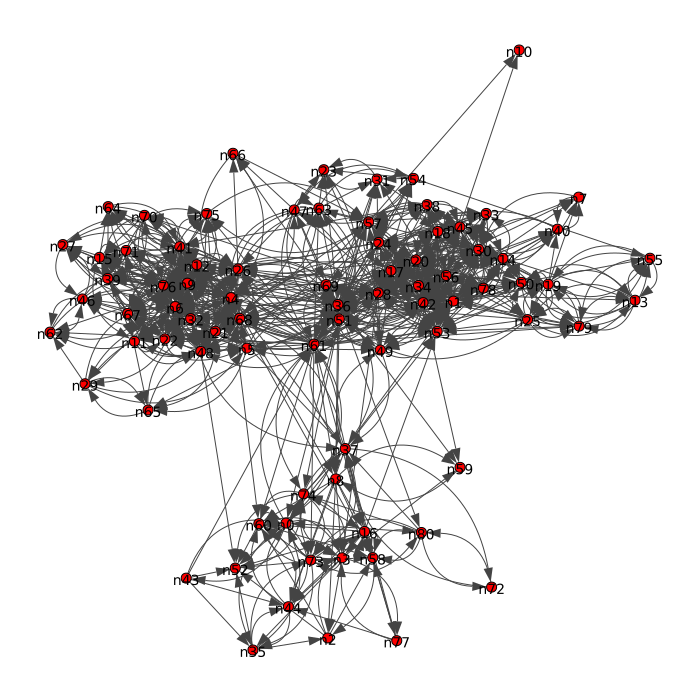

In [2]:
# Calculates degree centrality for a graph g
def degree_centrality(g):
    # TODO: Implement the degree centrality
    num_vertices = g.vcount()
    d_centrality = [0] * num_vertices
    for v1 in range(0,num_vertices):
        for v2 in range(0,num_vertices):
            if(v1==v2):
                continue
            if(g.are_connected(v1,v2)):
                d_centrality[v1] += 1
                d_centrality[v2] += 1
    return d_centrality

# TODO: Import the graph
g = ig.Graph.Read_GraphML("UniversityNetwork.graphml")

# Formatting the graph
visual_style = {}
visual_style['vertex_size'] = 10
visual_style['vertex_label'] = g.vs['id']
visual_style['bbox'] = (700, 700)
visual_style['margin'] = 50

# TODO: Calculate the degree centrality
print("Degree centrality : ", degree_centrality(g))

# TODO: Plot the graph
ig.plot(g, **visual_style)

## Problem 2.2: Closeness Centrality

Now we want to take a closer look at the closeness centrality for the given network. It measures how close a node is to other nodes in the graph. This is calculated via the sum of distances from that node to all the other nodes in the graph.

**Write a Python program that computes the closeness centrality for each node for the given social network.** The output should be a list where each item contains the value of the closeness centrality of a node. You are **not allowed** to use the pre-defined function `closeness()` , but you can use it as an inspiration.

**Notes:**
* The formula for the closeness centrality can be found in the lecture or exercise slides.
* Calculating the shortest paths is a common problem, maybe there is a pre-defined function for that?
* The edges of the graph have weights which you need to take into account for shortest paths calculation.
* You can print the node ID list with: `print(g.vs['id'])`
* You can print the edge list with: `print(g)`

In [3]:
# Calculates the closeness centrality for a graph g
def closeness_centrality(g):
    c_centrality = list()

    # TODO: Calculate shortest paths list for each node
    shortest_dists = g.shortest_paths(weights=g.es["weight"],mode="ALL")
    
    # TODO: Calculate closeness centrality for each node
    for shortest_dists_from_v in shortest_dists:
        dist_sum = 0
        for dist in shortest_dists_from_v:
            if str(dist) == "inf":
                continue
            dist_sum += dist
        
        if dist_sum == 0:
            c_centrality.append(0)
        else:
            c_centrality.append((g.vcount()-1)/dist_sum)
    
    return c_centrality
    
# TODO: Calculate closeness centrality
print("Closeness centrality: ", closeness_centrality(g))

print("\nCloseness centrality using predefined function: ", g.closeness(weights=g.es["weight"]))


Closeness centrality:  [0.34934497816593885, 0.40816326530612246, 0.3137254901960784, 0.3686635944700461, 0.41450777202072536, 0.38095238095238093, 0.40816326530612246, 0.33613445378151263, 0.42328042328042326, 0.42105263157894735, 0.29304029304029305, 0.3389830508474576, 0.3463203463203463, 0.3225806451612903, 0.3755868544600939, 0.39408866995073893, 0.38461538461538464, 0.41025641025641024, 0.32388663967611336, 0.39408866995073893, 0.34934497816593885, 0.38461538461538464, 0.3902439024390244, 0.34934497816593885, 0.3292181069958848, 0.365296803652968, 0.3864734299516908, 0.34934497816593885, 0.4166666666666667, 0.3125, 0.3418803418803419, 0.39408866995073893, 0.34334763948497854, 0.39215686274509803, 0.39408866995073893, 0.272108843537415, 0.49079754601226994, 0.41450777202072536, 0.3669724770642202, 0.40816326530612246, 0.3755868544600939, 0.37735849056603776, 0.36199095022624433, 0.34782608695652173, 0.34334763948497854, 0.2631578947368421, 0.3018867924528302, 0.38461538461538464, 

## Problem 2.3: Betweenness Centrality

Betweenness centrality also measures centrality based on shortest paths. For every pair of vertices in a graph, there exists a shortest path between the vertices such that either the number of edges that the path passes through (for undirected graphs) or the edges' sum of the weights (for directed graphs) is minimized.<br>
Vertices with high betweenness may have considerable influence within a network by virtue of their control over information passing between others.

**Calculate the betweenness centrality with the help of the pre-defined function in the igraph library. Interpret the resulting values based on two exemplary nodes.** To do that, pick two nodes and explain how their betweenness centrality links to the graph structure. Name the two nodes that you discussed (and their betweenness centrality). Do not write more than 5 sentences.

Betweenness centrality:  [301.80581357076716, 236.99784342560295, 3.9797186147186143, 177.68360953790446, 330.1655117660822, 113.52023881872006, 295.4629219585366, 0.0, 182.0059115885499, 260.89773771993964, 0.0, 13.70279651362362, 84.00295378488609, 4.487128272054742, 20.242980244318577, 13.828941144588965, 334.8711802963119, 21.045076779439338, 29.12282920470981, 54.99366845983247, 228.3169305603915, 129.96490629363615, 15.87135317155981, 98.4613429623412, 24.883730978981625, 146.7599845643532, 239.76792874065987, 5.723030186188081, 1046.3503921545982, 8.211132042560612, 185.3175358881936, 3.417857142857143, 154.45666084643483, 4.3021564796838305, 69.50564951556642, 10.752380952380953, 730.1707891468012, 434.0521500804741, 31.57199711459995, 12.835968767305094, 3.410965745373856, 86.95711699698322, 72.48371594601666, 0.25, 12.026099227569816, 124.3304760593442, 22.1487391221845, 56.86222941024572, 113.57845181602143, 78.45263159523398, 113.79999007187064, 368.8924603660344, 9.9278119

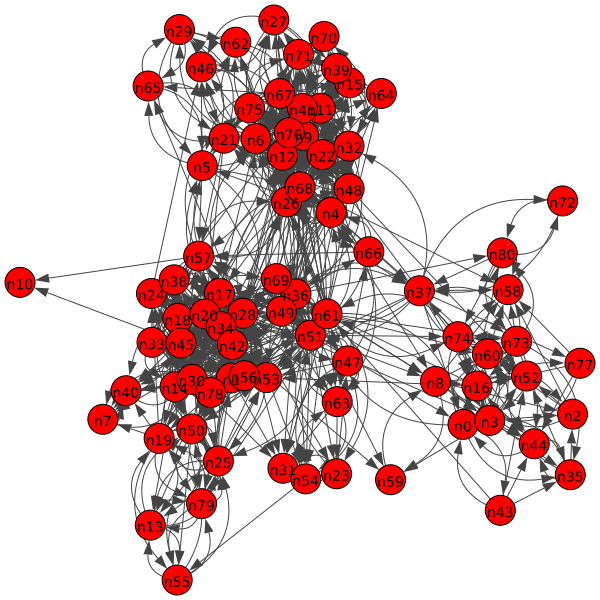

In [4]:
# TODO: Calculate the betweenness centrality (using the pre-defined function is fine)
print("Betweenness centrality: ", g.betweenness())

# Formatting the graph
visual_style = {}
visual_style['vertex_size'] = 30
visual_style['vertex_label'] = g.vs['id']
#visual_style['bbox'] = (700, 700)
#visual_style['margin'] = 50

ig.plot(g,**visual_style)



**TODO: Write your discussion here!**
#For every node, betweenness centrality gives a probability of that node occurring on a randomly chosen shortest
#path between any two randomly chosen nodes.So, it can be seen as a measure of how influential the node is in
#the given network. Lets take the example of node 0 and node 10. Node 0 has high betweenness and node 10 has very #low. In the graph also, it can be seen that node 10 is connected to only two other nodes, so the probability of #it appearing of shortest path should be low. For node 0, it is exactly the opposite case.